<a href="https://colab.research.google.com/github/Zven94/ciencia-de-datos/blob/main/TPFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP FINAL

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.

**Ejercicio 4**\
Detectar Valores Ausente  y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

**Ejercicio 7**\
Sobre el Dataset Elegido  explique si se puede reducir las dimensiones  y que representa esas  nuevas variables.

**Dataset a utilizar FIFA 2021 Complete Player Dataset:**
https://www.kaggle.com/datasets/aayushmishra1512/fifa-2021-complete-player-data?select=FIFA-21+Complete.csv

FIFA 2021 Complete Player,Es un dataset basado en un eSport, sus variables son:


*   Player ID (player_id)
*   Name of the Player (name)
*   Nationality of the Player (nationality)
*   Position of the Player (position)
*   Player Overall Rating (overall)
*   Age of the Player (age)
*   The hits of the player (hits)
*   The Potential for growth (potential)
*   The team that the player plays for (team)





Este conjunto de datos contiene información sobre jugadores de fútbol y sus características:

**player_id:**

*Tipo: Numérica discreta.
Características: Identificador único para cada jugador. No tiene un orden específico ni una relación numérica con otros valores.*

**name:**

*Tipo: Variable de texto (categórica nominal).
Características: Contiene el nombre del jugador en formato de texto. Cada nombre es único y no tiene un orden inherente.*

**nationality:**

*Tipo: Variable categórica nominal.
Características: Representa la nacionalidad del jugador. Cada nacionalidad es una categoría única sin un orden específico.*

**position:**

*Tipo: Variable de texto (categórica nominal u ordinal, dependiendo de cómo se interprete).
Características: Describe la posición o posiciones en las que juega el jugador. Puede ser categórica nominal si no hay un orden específico entre las posiciones o categórica ordinal si existe un orden (por ejemplo, portero, defensa, mediocampista, delantero).*

**overall:**

*Tipo: Numérica discreta.
Características: Representa la calificación general del jugador. Es un valor numérico que puede variar en un rango específico.*

**age:**

*Tipo: Numérica discreta.
Características: Indica la edad del jugador en años. Es una variable numérica discreta.*

**hits:**

*Tipo: Numérica discreta.
Características: Representa el número de "hits" o visitas relacionadas posiblemente con la popularidad del jugador en un sitio web o plataforma. Es una variable numérica discreta.*

**potential:**

*Tipo: Numérica discreta.
Características: Indica el potencial del jugador. Es un valor numérico que puede variar en un rango específico.*

**team:**

*Tipo: Variable de texto (categórica nominal).
Características: Representa el equipo al que pertenece el jugador. Cada equipo es una categoría única sin un orden*

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "/content/FIFA-21 Complete.csv"

# Descargar el archivo CSV y cargarlo en un DataFrame
df = pd.read_csv(url, sep=';')

# Crear un diccionario
dicc = {}

# Iterar a través del DataFrame y agregar la informacion al diccionario de datos
for column in df.columns:
    dicc[column] = df[column].tolist()

# Imprimir el diccionario de datos
print(dicc)
print(df)

{'player_id': [158023, 20801, 190871, 203376, 200389, 192985, 188545, 183277, 212831, 209331, 208722, 192448, 153079, 231747, 215914, 202126, 194765, 182521, 177003, 176580, 167495, 155862, 210257, 202652, 201942, 201024, 200145, 193080, 192119, 189511, 188567, 165153, 162835, 152729, 138956, 218667, 212622, 212218, 211110, 200104, 199556, 195864, 193041, 192387, 190460, 189513, 188350, 186153, 183898, 182493, 178603, 175943, 168542, 167948, 164240, 233049, 232363, 228702, 222492, 220440, 216267, 212198, 212188, 209499, 208830, 208670, 207865, 204485, 201535, 201399, 198219, 193747, 192505, 189509, 189332, 184344, 184087, 180206, 179813, 177683, 143076, 235243, 231866, 231281, 230658, 230621, 226753, 223848, 216594, 216460, 212190, 208421, 206113, 205600, 204963, 198706, 198176, 197965, 197781, 192629, 192563, 189596, 189242, 189117, 187961, 185122, 183711, 181291, 177413, 173731, 172871, 168651, 167664, 135507, 41236, 235790, 231677, 231478, 226790, 220814, 213345, 212462, 212194, 210

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64


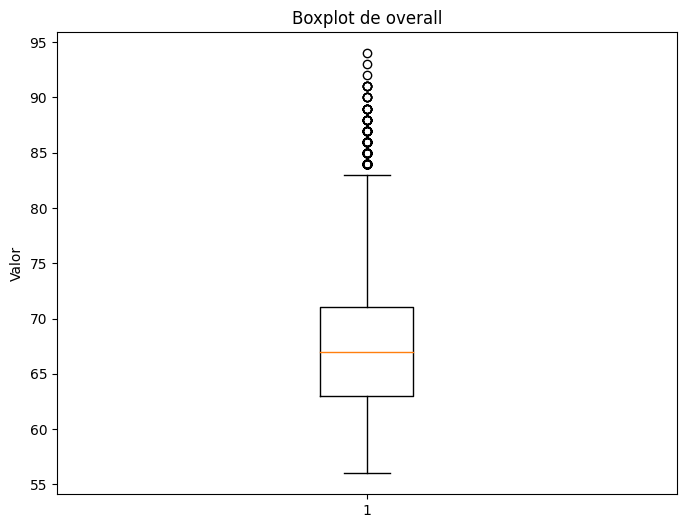

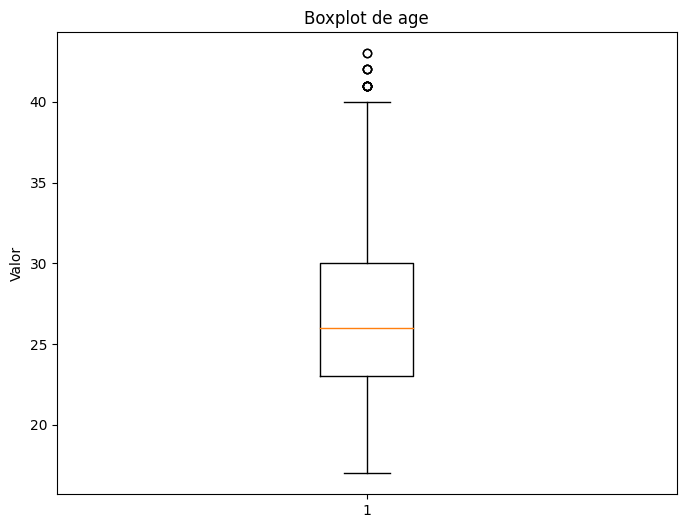

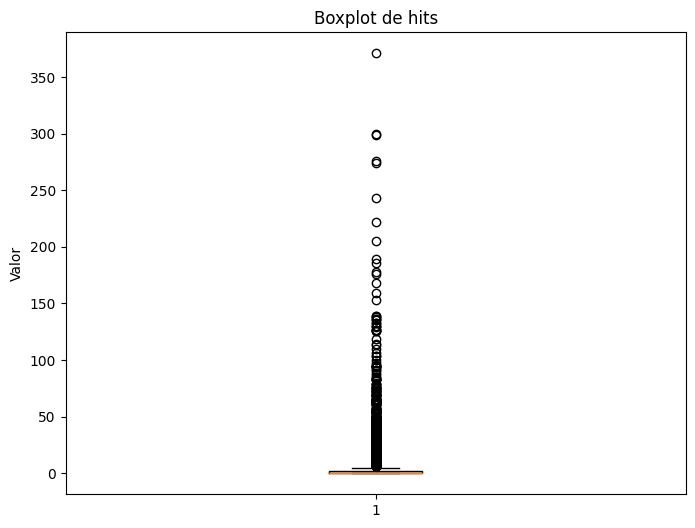

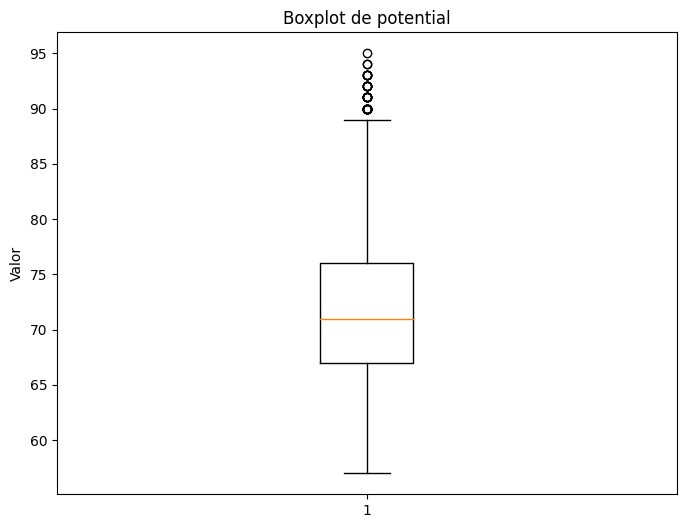

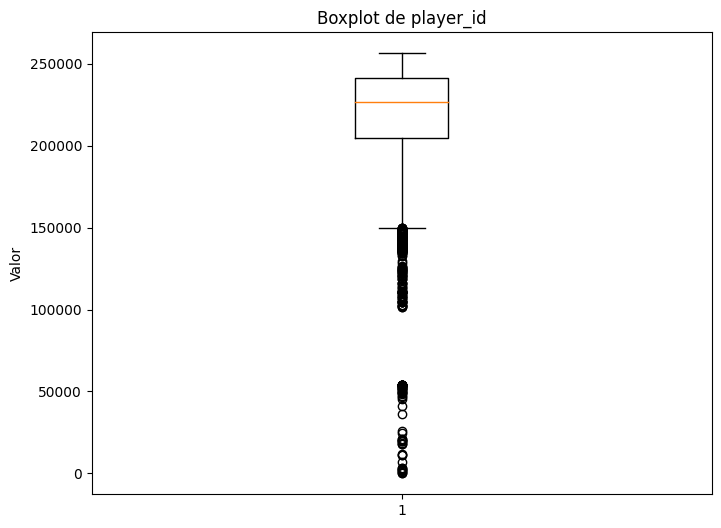

In [28]:
# Detectar valores ausentes en el DataFrame

nullValues = df.isnull().sum()
print(nullValues)

# Columnas numericas
columnas_numericas = ['overall', 'age', 'hits', 'potential', 'player_id']


for c in columnas_numericas:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[c])
    plt.title(f'Boxplot de {c}')
    plt.ylabel('Valor')
    plt.show()




Encontramos  2126  outliers


<Axes: >

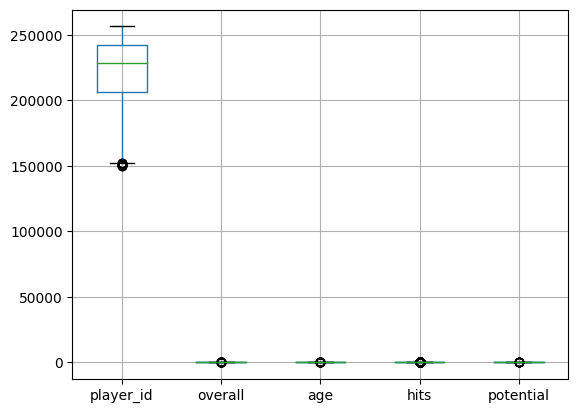

In [31]:
# detectar outliers

def detect_outliers(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return outliers

outl_list = []
for c in columnas_numericas:
  outliers = detect_outliers(df,c)
  outl_list.append(outliers)

all_outliers = pd.concat(outl_list)
fixed_dataframe = df.drop(all_outliers.index)
print ("Encontramos " , len(all_outliers) ," outliers")
fixed_dataframe.boxplot()

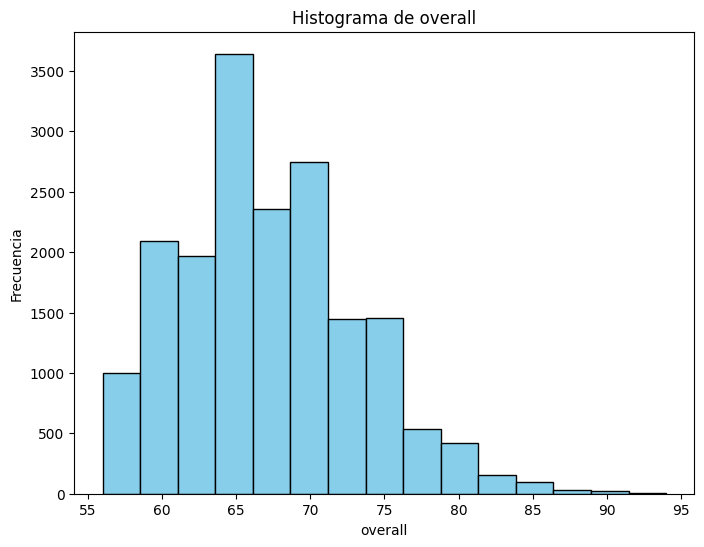

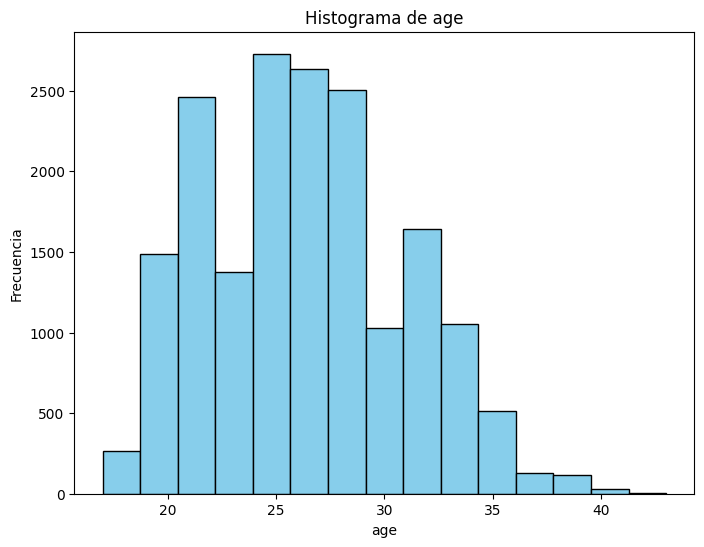

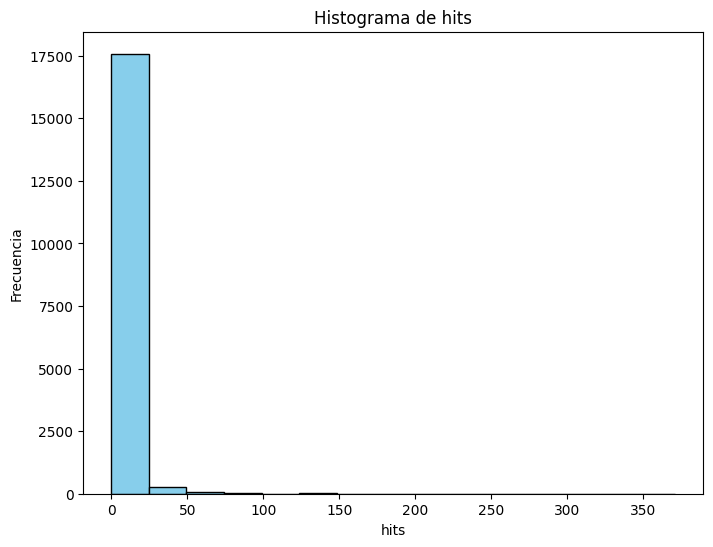

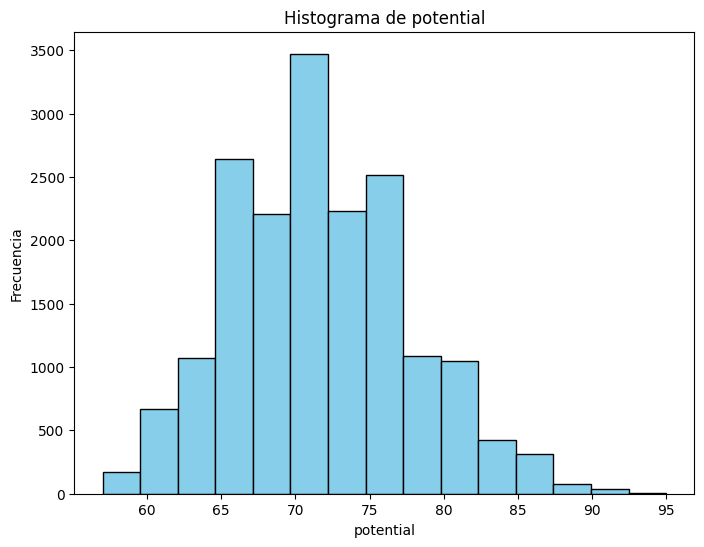

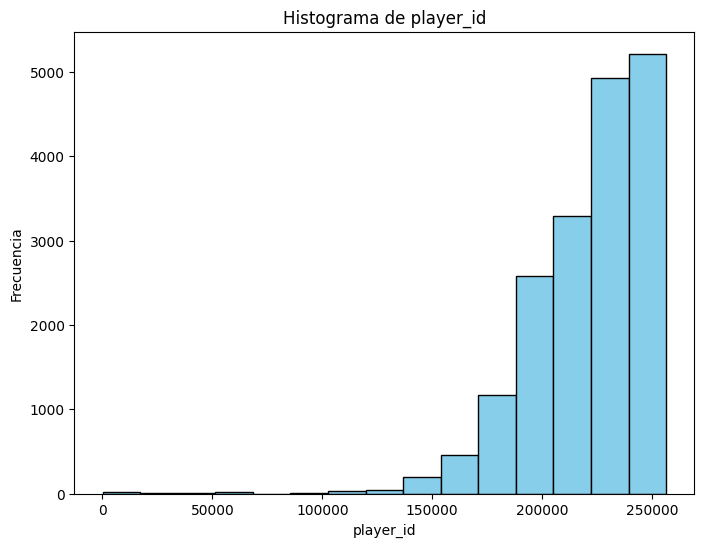

In [32]:
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    plt.hist(df[columna], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

 **A continuación, algunas conclusiones basadas en los gráficos y estadísticas:**

Overall (Calificación general): La mayoría de los jugadores tienen una calificación general cercana a 90, con algunos valores en torno a 94. Pocos jugadores tienen calificaciones por debajo de 90.

Age (Edad): La edad de los jugadores varía desde alrededor de 21 hasta 36 años. La mayoría de los jugadores tienen edades en el rango de 27 a 34 años.

Hits (Número de visitas o "hits"): La mayoría de los jugadores tienen un número bajo de visitas, pero algunos tienen un número significativamente mayor. Esto podría indicar una diferencia en la popularidad o visibilidad de los jugadores.

Potential (Potencial): El potencial de los jugadores varía, pero la mayoría de ellos tienen un potencial cercano a 89 o 90.

<ipython-input-34-e2b5f566aae7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = df.corr()


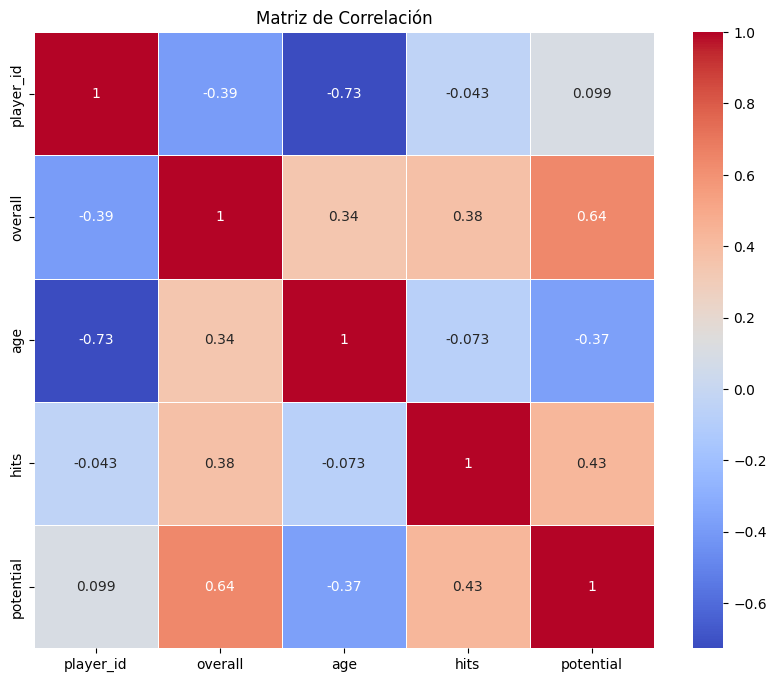

In [34]:
# Calcular la matriz de correlación
correlationMatrix = df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

*Calculamos la matriz de correlación utilizando df.corr(). Finalmente, creamos un mapa de calor utilizando seaborn para visualizar la matriz de correlación. Las celdas del mapa de calor muestran los valores de correlación entre las variables. Cuanto más cercano sea el valor a 1 o -1, mayor será la correlación (positiva o negativa) entre las variables.*

*Después de ejecutar este código, se puede identificar visualmente las correlaciones entre las variables. Las variables con una correlación positiva cercana a 1 están altamente correlacionadas, mientras que las variables con una correlación negativa cercana a -1 están inversamente correlacionadas. Las celdas cercanas a 0 indican una correlación débil.*


**Para los que entregan en blanco**

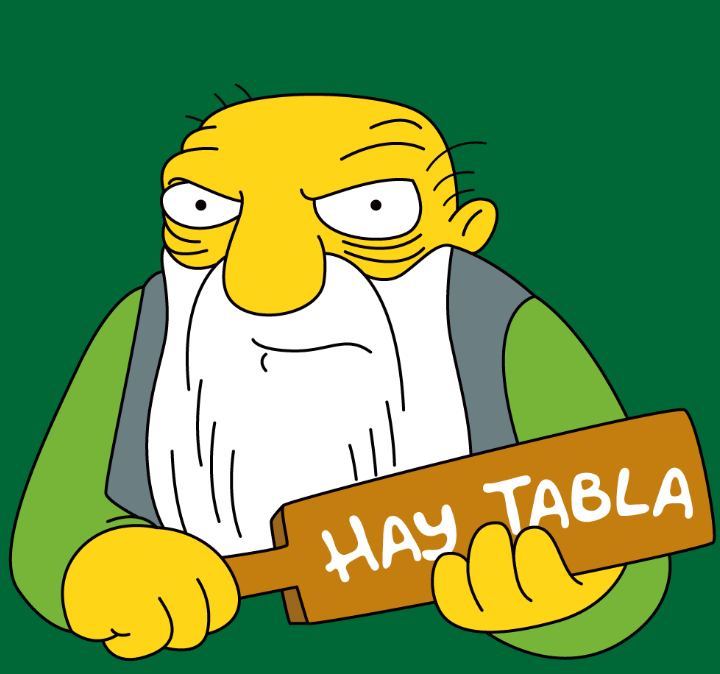